<a href="https://colab.research.google.com/github/dhairyaostwal/CSE4020-Codes/blob/main/Lab-FAT/19BCE2199_ML_LabFAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML LAB FAT

### Name: Dhairya Ostwal
### Reg: 19BCE2199

------------Iterative 0 ------
out_IL: [[ 1.00000000e+00  4.75000000e+03  2.79916000e+02  8.50289180e-01
   1.00000000e+00  9.00000000e+01  2.82000000e+03  5.93684210e-01
   2.33616000e+02  6.49312560e-01  7.86830880e-01  9.30079160e-01
   3.03200000e+03  1.42944560e+02  1.27818135e+02  1.66495855e+02
  -2.62367660e+01  5.77350269e+01  1.09696551e+02  5.07189233e+01
   8.21800034e+01  1.62763511e+00]
 [ 1.00000000e+00  1.08770000e+04  4.09802000e+02  4.92338420e-01
   9.59087980e-01 -7.00492710e+01  8.29700000e+03  7.95341260e-01
   3.51699000e+02  8.42924520e-01  5.81372250e-01  9.55105330e-01
   8.68700000e+03  1.43774239e+02  1.29215457e+02  1.60578454e+02
  -3.08115470e+01  1.10186676e+02  1.26592587e+02  9.35948610e+01
   1.15032601e+02  1.75810441e+00]
 [ 1.00000000e+00  1.04650000e+04  3.98327000e+02  6.81892800e-01
   9.96559960e-01  8.72091207e+01  7.55500000e+03  7.24422280e-01
   3.27012000e+02  8.87803710e-01  7.31675750e-01  9.70331360e-01
   7.78600000e+03  1.26637787e+02

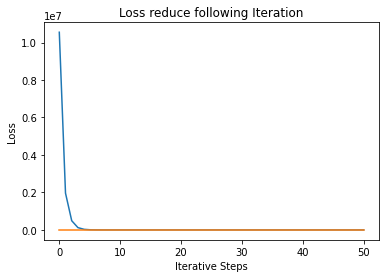

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

PATH = 'data.csv'
df = pd.read_csv(PATH,header=None)
# data = np.array(df)
data = df
x = data.iloc[:, 2:24].values 
y = data.iloc[:, 1].values 
train_size = 5 # assigning train_size
x_train=x[0:train_size,:]
y_train=y[0:train_size]

N = len(y_train)

def one_hot(y):
	for i in range(len(y)):
		if y[i] == 'M':
			y[i] = 0.0
		else:
			y[i ]= 1.0
	return y
y_train = one_hot(y_train).reshape((N,1))

y_train = y_train.astype('float')
x_train = x_train.astype('float')

np.random.seed(2)
nodes = 5
steps = 50
alpha = 0.5

loss_data = np.zeros((steps,1))
accuracy_data = np.zeros((steps,1))


def Sigmoid(x):
  return np.maximum(x, 0)
  # return 1 / (1 + np.exp(-x.astype('float')))
def SigmoidDerivative(x):
  return np.maximum(x,0)
  # return x * (1 - x)

hws = 2*np.random.random((x_train.shape[1] + 1, nodes)) - 1
ows = 2*np.random.random((nodes + 1, y_train.shape[1])) - 1



def ForwardPropagation(x,w1,w2,train=True):

	out_IL = np.hstack((np.ones((x.shape[0],1)),x))
 
	out_HL =  np.dot(out_IL, w1)
	
	out_HL = Sigmoid(out_HL)

	out_HL = np.hstack((np.ones((x.shape[0], 1)),out_HL))
	out_OL = np.dot(out_HL, w2)

 
	if train:
		return out_IL,out_HL,out_OL
	else:
		return out_OL

def BackwardPropagation(y_hat,y):
  oe = y_hat - y
  he = SigmoidDerivative(out_HL[:, 1:]) * np.dot(oe, ows.T[:, 1:])
  print("oe: ", oe, "\nhe: ", he)
  d_HL = out_IL[:, :, np.newaxis] * he[: , np.newaxis, :]
  d_hws = np.average(d_HL,axis=0)
  d_OL = out_HL[:, :, np.newaxis] * oe[:, np.newaxis, :]
  d_ows = np.average(d_OL,axis=0)
  return d_hws,d_ows

def Cost(y_hat,y,train=True):
	loss = np.sum(np.square(y_hat - y))
	print('Loss:{}'.format(loss))
	loss_data[i] = loss

	y_hat = (y_hat>=0.5)
	y = (y == 1.0)
	accuracy = np.sum((y_hat == y))
	print('Accuracy:{}%'.format((accuracy/N)*100))
	accuracy_data[i] = accuracy

	if train:
		return loss_data,accuracy_data
	else:
		pass


for i in range(steps):
  print('------------Iterative',str(i),'------')
  out_IL,out_HL,out_OL = ForwardPropagation(x_train,hws,ows)
  print("out_IL: {}, \nout_HL: {}, \nout_OL: {}".format(out_IL, out_HL, out_OL))
  
  loss_data,accuracy_data = Cost(out_OL,y_train)
  d_hws,d_ows = BackwardPropagation(out_OL,y_train)
  hws += -alpha * d_hws
  ows += -alpha * d_ows
  print('------------Iterative Done------','\n')

print('------------ Training Complete ------','\n')

def painter(loss,accuracy,scales):
	fig = plt.figure()
	x = np.linspace(0, scales, scales)
	plt.plot(x, loss, label='Loss')
	plt.plot(x, accuracy_data, label='Accuracy')
	plt.xlabel('Iterative Steps')
	plt.ylabel('Loss')
	plt.title('Loss reduce following Iteration')
	plt.savefig('Result_tain.png')
	#plt.show()
painter(loss_data,accuracy_data,steps)


x_test=x[train_size:,:]
y_test=y[train_size:]

N = len(y_test)

y_test = one_hot(y_test).reshape((N,1))

out_OL = ForwardPropagation(x_test,hws,ows,train=False)
print('------------ TEST Result ------')
Cost(out_OL,y_test,train=False)
print('------------ TEST Result ------')